In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
import statsmodels.api as sm
import sklearn
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from math import sqrt
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
df=pd.read_csv(r"C:\Users\acer\Desktop\UPGRAD\machine learning\CarPrice_Assignment.csv")

In [4]:
df.head(5)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
df.shape

(205, 26)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [7]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [8]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [9]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

# Cleaning the Data

In [10]:
df.drop_duplicates().head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [11]:
df['CarName'].value_counts()

toyota corona                      6
toyota corolla                     6
peugeot 504                        6
subaru dl                          4
mitsubishi mirage g4               3
mazda 626                          3
toyota mark ii                     3
mitsubishi outlander               3
mitsubishi g4                      3
honda civic                        3
volvo 264gl                        2
bmw 320i                           2
isuzu D-Max                        2
audi 100ls                         2
volvo 244dl                        2
porsche cayenne                    2
toyota corolla liftback            2
honda accord                       2
bmw x3                             2
volvo 144ea                        2
volvo 145e (sw)                    2
honda civic cvcc                   2
saab 99le                          2
toyota starlet                     2
saab 99gle                         2
toyota corolla 1200                2
mazda rx-4                         2
m

In [12]:
# Extract car brand name from 'CarName' column into new columns
def s(x):
    return x.split(' ')[0]
df['Brand_name'] = df['CarName'].apply(s)

In [13]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Brand_name
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [14]:
df['Brand_name'].value_counts()

toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
volkswagen      9
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
isuzu           4
porsche         4
alfa-romero     3
chevrolet       3
jaguar          3
vw              2
maxda           2
renault         2
toyouta         1
vokswagen       1
Nissan          1
mercury         1
porcshce        1
Name: Brand_name, dtype: int64

In [15]:
df.Brand_name.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [16]:
df['Brand_name']=df['Brand_name'].apply(lambda x: x.lower())

In [17]:
# spelling error names and correct names are initialized in a dictionary
s={'toyouta':'toyota','maxda':'mazda','vokswagen':'volkswagen','vw':'volkswagen',
    'porcshce':'porsche'}

In [18]:
# replace the errors in the column Brand_name
df['Brand_name'].replace(s,inplace=True)

In [19]:
df.Brand_name.value_counts()

toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
volkswagen     12
subaru         12
peugeot        11
volvo          11
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
jaguar          3
chevrolet       3
alfa-romero     3
renault         2
mercury         1
Name: Brand_name, dtype: int64

In [20]:
df.head(5)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Brand_name
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [21]:
# now the car_ID and car_name doesn't have any impact on price so it can be dropped
df.drop(['car_ID','CarName'],axis=1,inplace=True)

In [22]:
df.head(5)

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Brand_name
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [23]:
df.symboling.value_counts()

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64

In [24]:
# it seems that symboling has only 6 values that indicates the risk rating of car
# here -ve: safe 0,1: moderate 2,3: risky
s1={-3: 'safe',-2:'safe',-1:'safe',0:'moderate',1:'moderate',2:'risky',3:'risky'}
df['symboling']=df['symboling'].map(s1)

In [25]:
df.symboling.value_counts()

moderate    121
risky        59
safe         25
Name: symboling, dtype: int64

In [26]:
df['fuelsystem'].value_counts()

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuelsystem, dtype: int64

In [27]:
# mfi is error spelling of mpfi replace it
df['fuelsystem'].replace('mfi','mpfi',inplace=True)

In [28]:
df['enginetype'].value_counts()

ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: enginetype, dtype: int64

In [29]:
# mis-spelled dohc:dohcv ohc:ohcv
e={'dohcv':'dohc','ohcv':'ohc'}
df['enginetype'].replace(e,inplace=True)

In [30]:
df['drivewheel'].value_counts()

fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64

In [31]:
# replace 4wd:fwd
df['drivewheel'].replace('4wd','fwd',inplace=True)

# Visualization of Data

<Figure size 2000x1000 with 0 Axes>

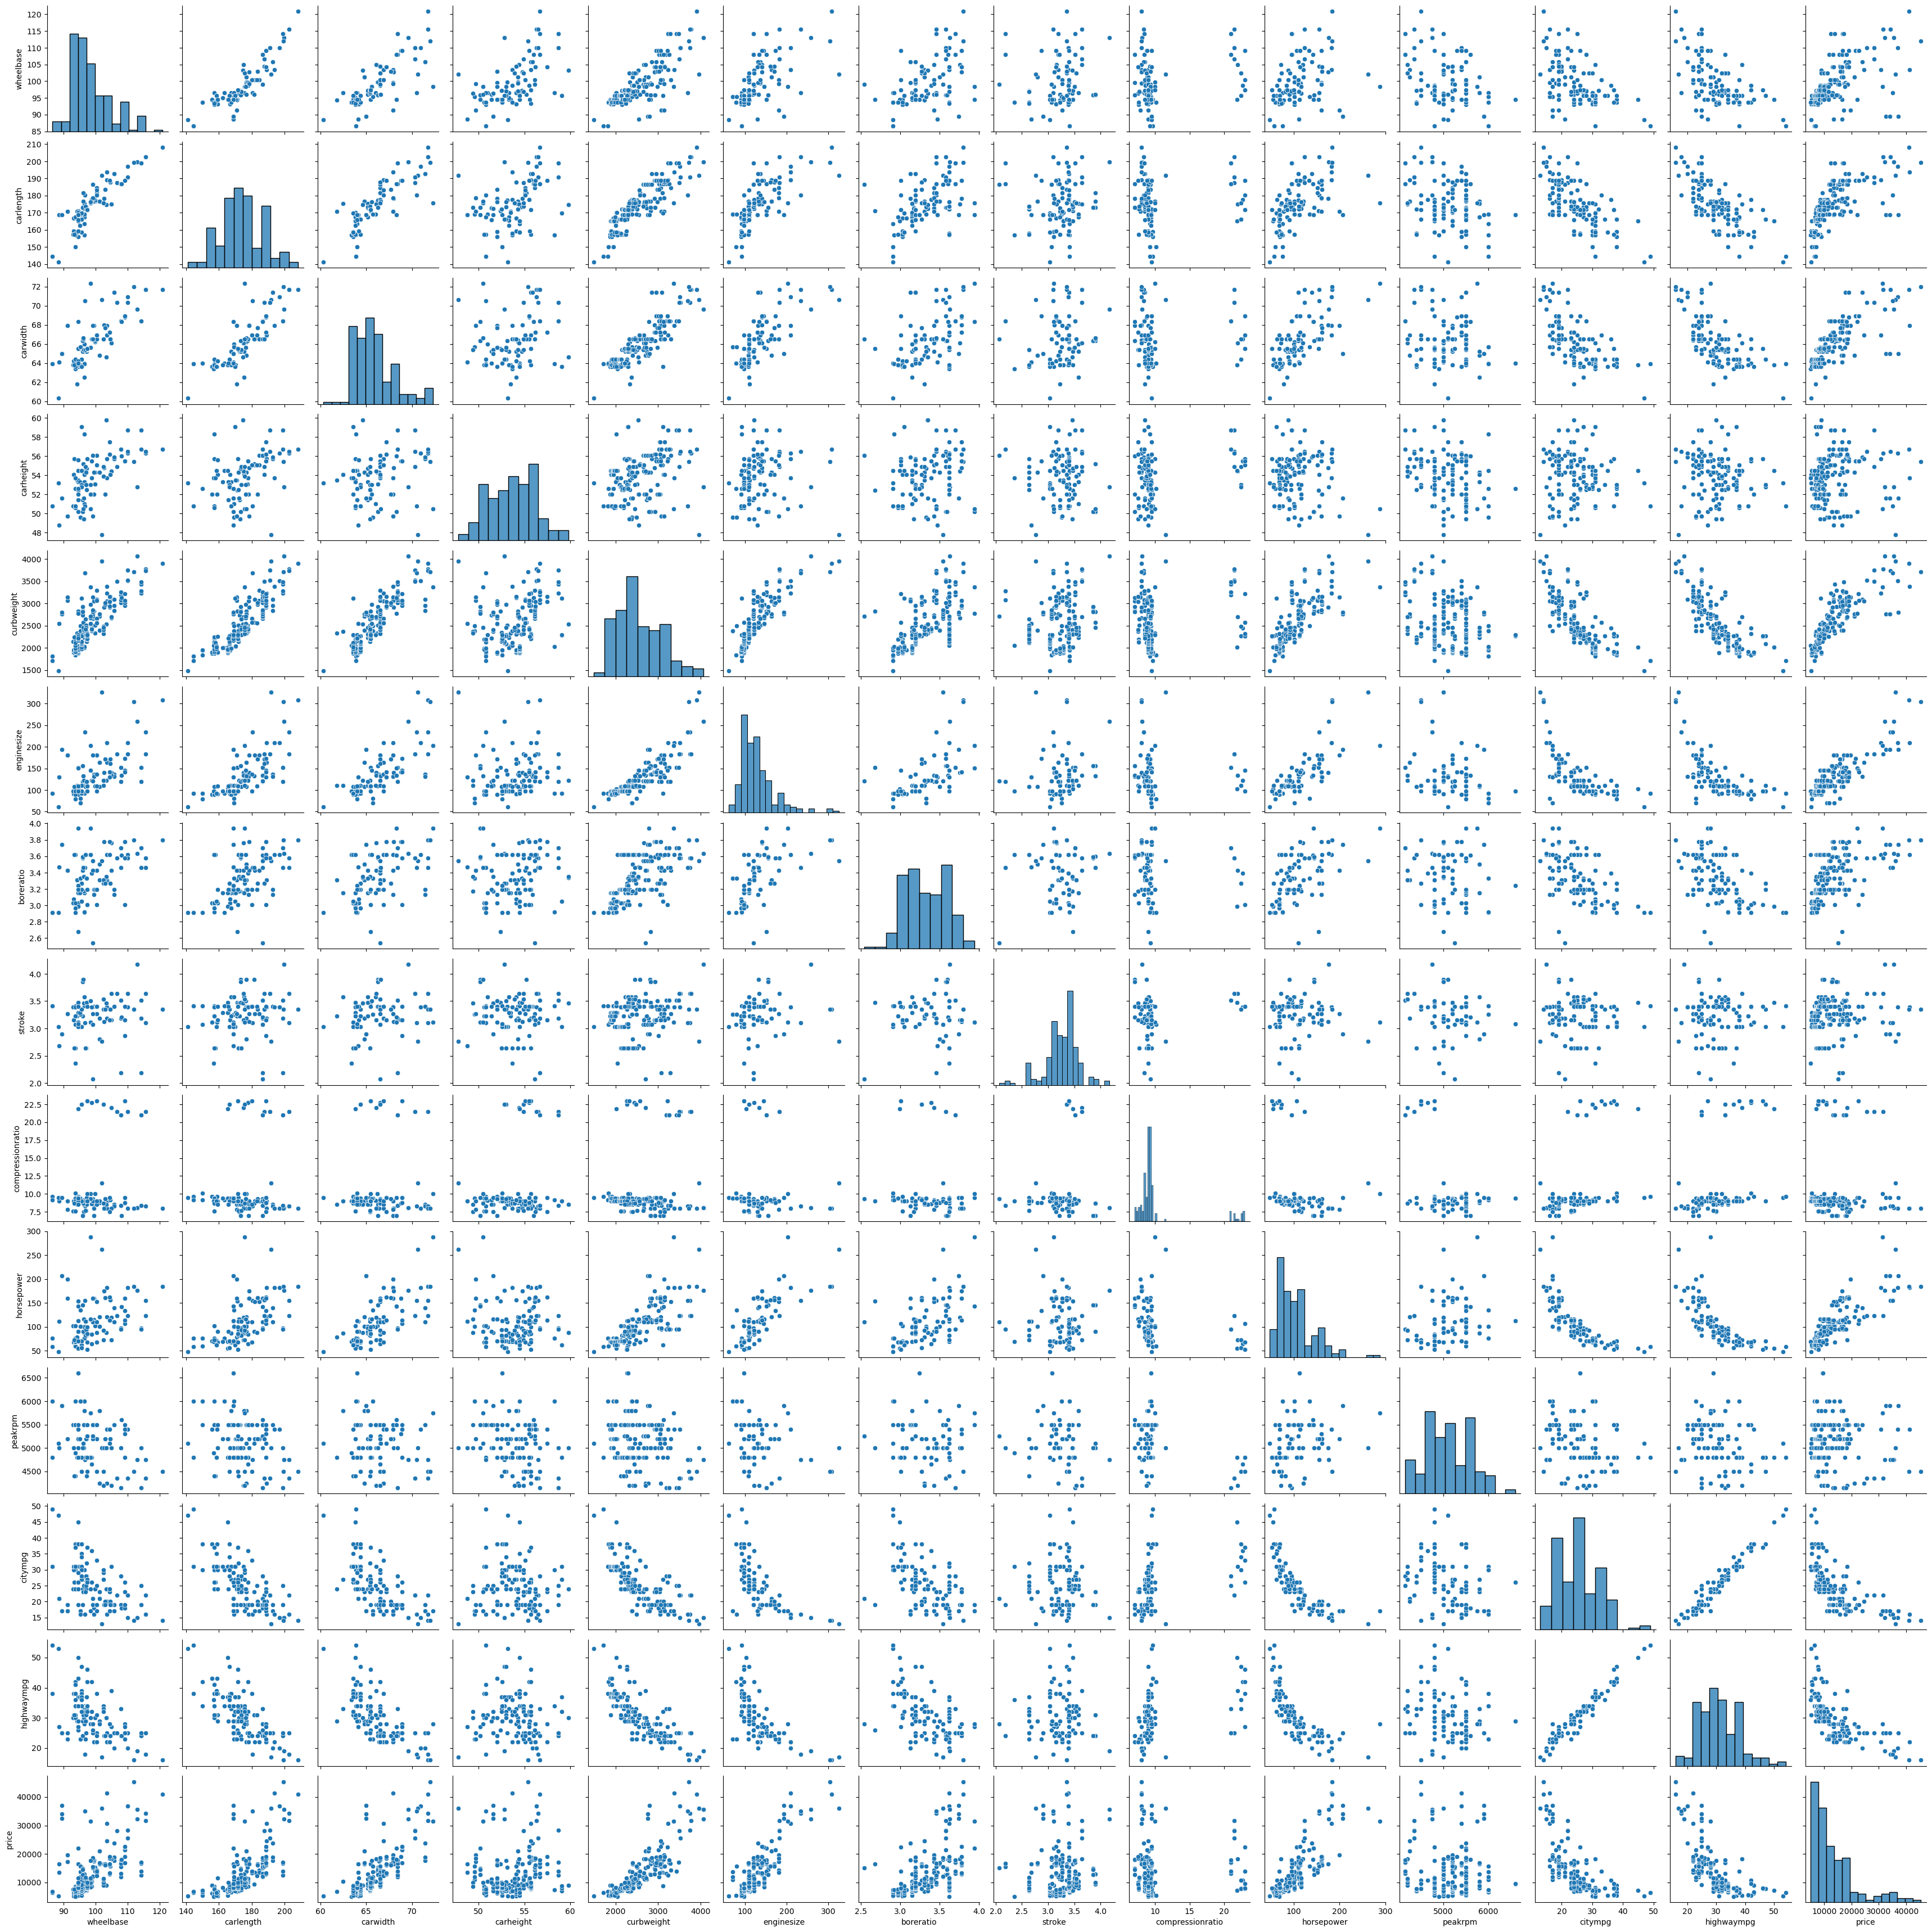

In [32]:
# visualizing all numeric data columns 1st
plt.figure(figsize=(20,10))
sns.pairplot(df)
plt.show()

In [33]:
# now the correlation between the numeric values
c=df.corr()
c

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
wheelbase,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443
compressionratio,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,0.005197,0.186110,1.000000,-0.204326,-0.435741,0.324701,0.265201,0.067984
horsepower,0.353294,0.552623,0.640732,-0.108802,0.750739,0.809769,0.573677,0.080940,-0.204326,1.000000,0.131073,-0.801456,-0.770544,0.808139


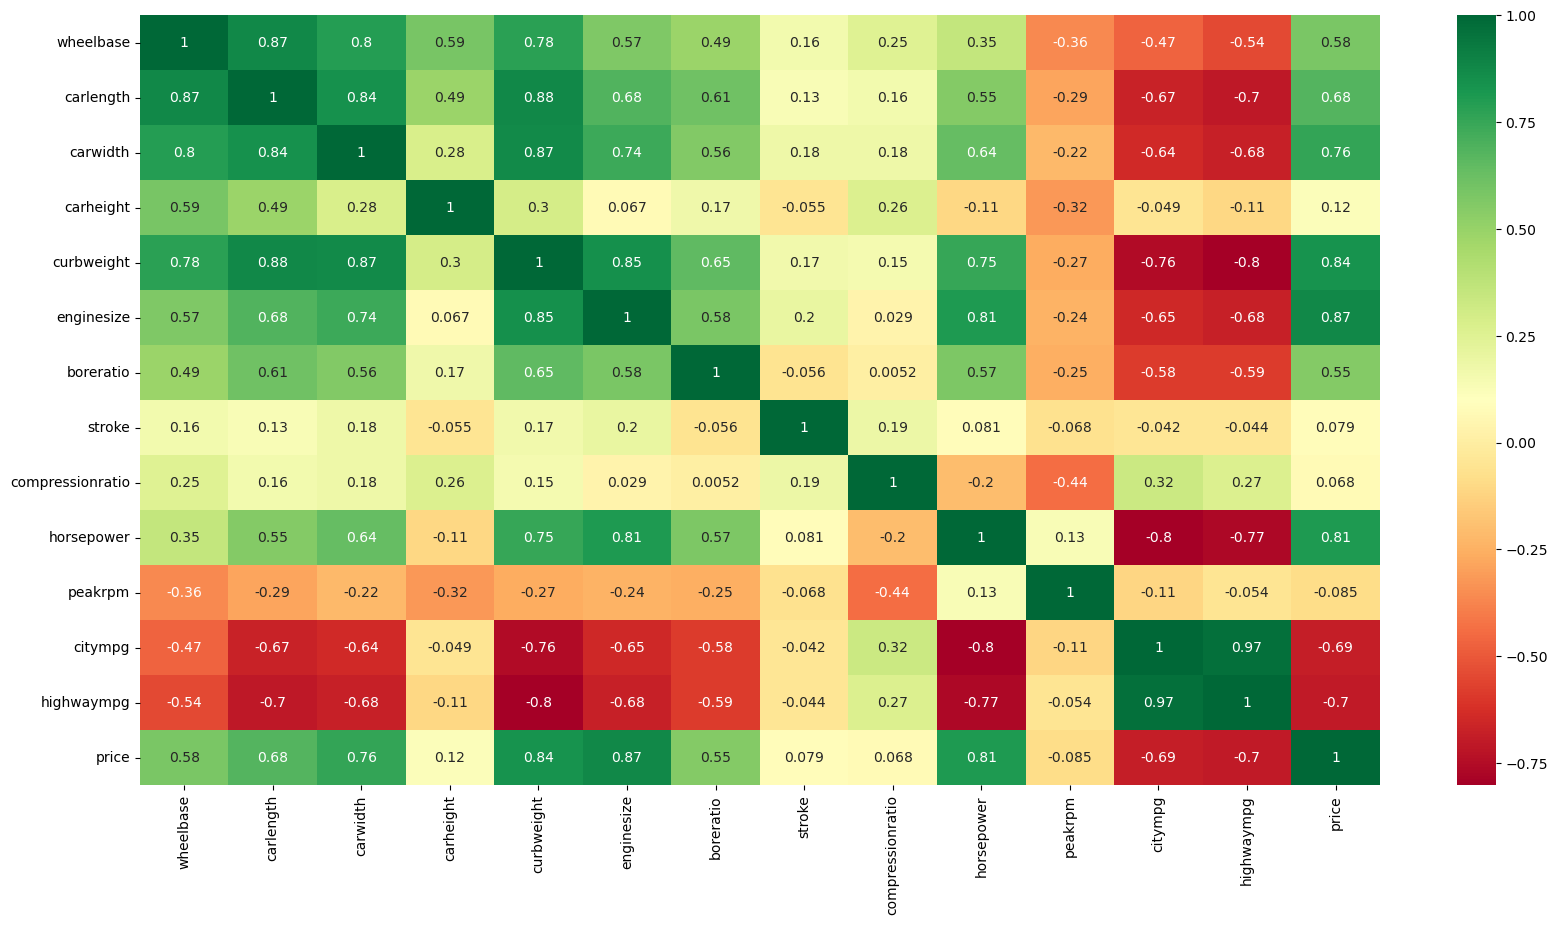

In [34]:
# plotting the correlation using heatmap to find positive and negative relations
plt.figure(figsize=(20,10))
sns.heatmap(c,annot=True,cmap='RdYlGn')
plt.show()

By observing the heatmap it's concluded that columns having +ve relations with price are:
- wheelbase
- carlength
- carwidth
- curbweight
- enginesize
- boreratio
- horsepower

Columns having -ve relations with price are:
- citympg
- highwaympg

There are some high relation with dependent variable and there are few variables having ver high co-relation with some variables such are:
- enginesize with horsepower and curbwidth
- curbweigth with enginesize, carwidth and carlength
- highwaympg with citympg
these multi-collinearity must be considered while building model

In [35]:
df.loc[:,'enginesize/horsepower']=df.enginesize/df.horsepower
df.loc[:,'curbweight/enginesize']=df.curbweight/df.enginesize
df.loc[:,'carwidth/carlength']=df.carwidth/df.carlength
df.loc[:,'highway/city']=df.highwaympg/df.citympg

In [36]:
df.drop(columns=['enginesize','carwidth', 'carlength', 'highwaympg', 'citympg'],axis=1,inplace=True)

In [37]:
df.head(5)

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carheight,curbweight,enginetype,cylindernumber,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,price,Brand_name,enginesize/horsepower,curbweight/enginesize,carwidth/carlength,highway/city
0,risky,gas,std,two,convertible,rwd,front,88.6,48.8,2548,dohc,four,mpfi,3.47,2.68,9.0,111,5000,13495.0,alfa-romero,1.171171,19.600000,0.379739,1.285714
1,risky,gas,std,two,convertible,rwd,front,88.6,48.8,2548,dohc,four,mpfi,3.47,2.68,9.0,111,5000,16500.0,alfa-romero,1.171171,19.600000,0.379739,1.285714
2,moderate,gas,std,two,hatchback,rwd,front,94.5,52.4,2823,ohc,six,mpfi,2.68,3.47,9.0,154,5000,16500.0,alfa-romero,0.987013,18.572368,0.382593,1.368421
3,risky,gas,std,four,sedan,fwd,front,99.8,54.3,2337,ohc,four,mpfi,3.19,3.40,10.0,102,5500,13950.0,audi,1.068627,21.440367,0.374858,1.250000
4,risky,gas,std,four,sedan,fwd,front,99.4,54.3,2824,ohc,five,mpfi,3.19,3.40,8.0,115,5500,17450.0,audi,1.182609,20.764706,0.375991,1.222222


In [38]:
# visualizing the categorical variables
df.select_dtypes(include='object').columns

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem', 'Brand_name'],
      dtype='object')

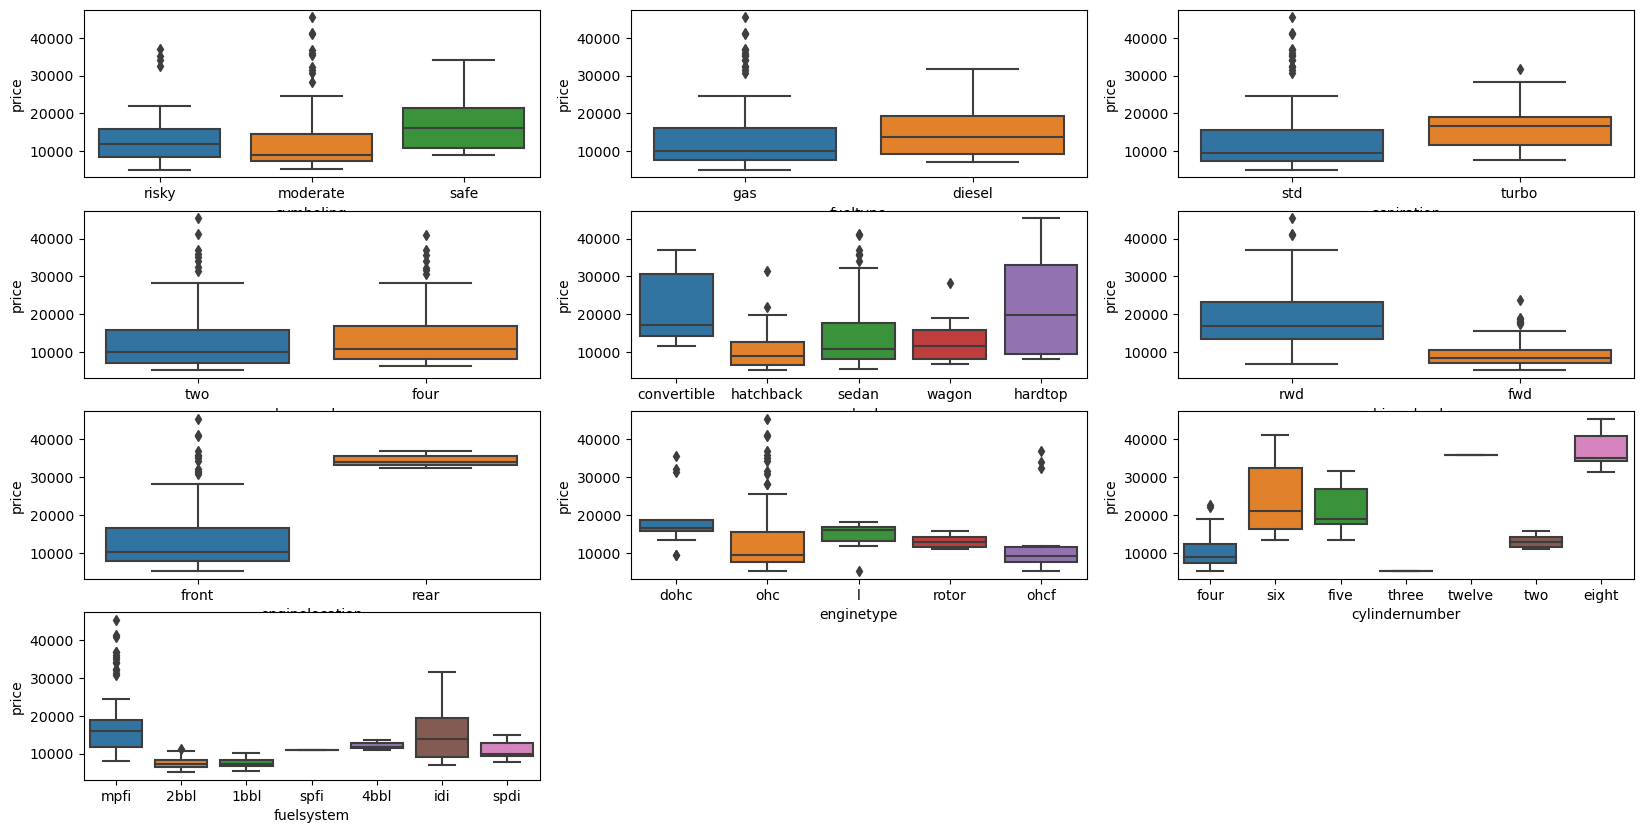

In [39]:
plt.figure(figsize=(20,10))
plt.subplot(4,3,1)
sns.boxplot(x='symboling', y='price',data=df)
plt.subplot(4,3,2)
sns.boxplot(x='fueltype', y='price',data=df)
plt.subplot(4,3,3)
sns.boxplot(x='aspiration', y='price',data=df)
plt.subplot(4,3,4)
sns.boxplot(x='doornumber', y='price',data=df)
plt.subplot(4,3,5)
sns.boxplot(x='carbody', y='price',data=df)
plt.subplot(4,3,6)
sns.boxplot(x='drivewheel', y='price',data=df)
plt.subplot(4,3,7)
sns.boxplot(x='enginelocation', y='price',data=df)
plt.subplot(4,3,8)
sns.boxplot(x='enginetype', y='price',data=df)
plt.subplot(4,3,9)
sns.boxplot(x='cylindernumber', y='price',data=df)
plt.subplot(4,3,10)
sns.boxplot(x='fuelsystem', y='price',data=df)
plt.show()

Here we got to know that:
- fueltype: disel cars are more expensive
- aspiration: turbo aspiration are more expensive
- doornumber: there is no such markable difference in price between 4 doors   cars and 2 doors cars.
- drivewheel: reverse way are expensive than forward.
- enginelocation: rear located engine cars are more expensive than others
- enginetype: ohcv types are more expensive than others
- cylinder number: 8 no of cylinders more expensive than others
- fuelsystem: idior mpfi more expensive than others

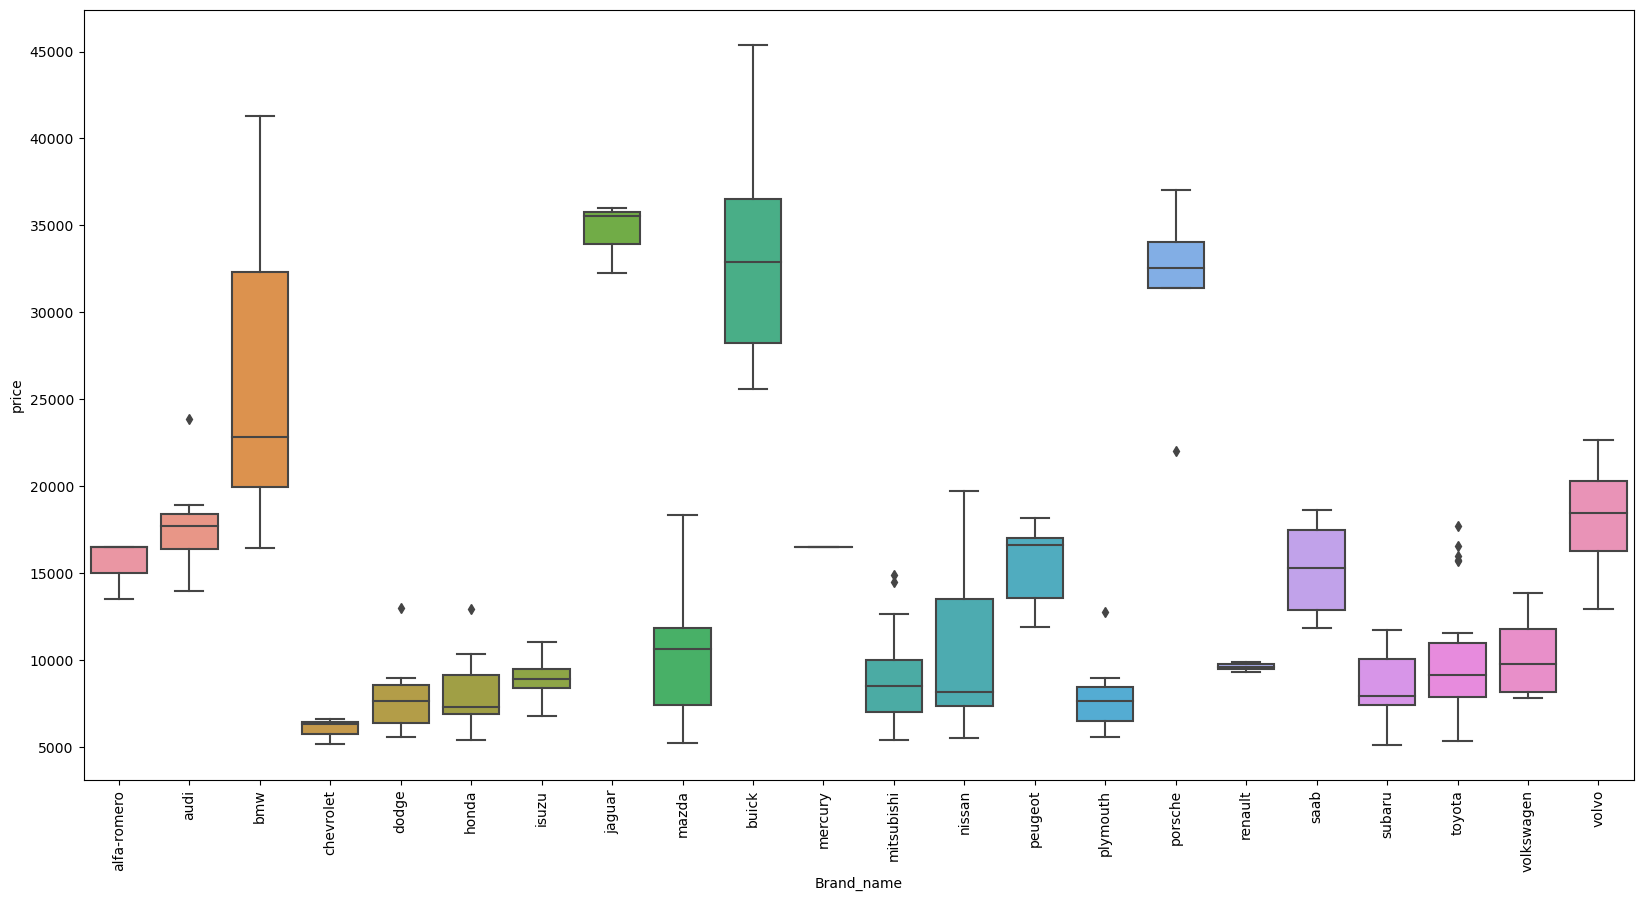

In [40]:
# check price of each car brand in US market
plt.figure(figsize=(20,10))
sns.boxplot(x='Brand_name', y='price', data=df)
plt.xticks(rotation=90)
plt.show()

In [41]:
print('Avg US car price: ',df['price'].mean())
print(df.groupby('Brand_name')['price'].mean().sort_values(ascending=False).head(5))

Avg US car price:  13276.710570731706
Brand_name
jaguar     34600.000000
buick      33647.000000
porsche    31400.500000
bmw        26118.750000
volvo      18063.181818
Name: price, dtype: float64


we got to know that:
-  Each company has a range in which the cars are priced. There are few outilers for these companies showing that they do manufacture some expensive cars which are priced above their usual market pricing range.
-  Cars manufacturers like jaguar, Buick, Porsche, BMW, Volo are clearly on the high end side, priced well above the average US cars price which is approx. $13,000.
-  company name shows some affect on the price determination.

 visulaizing Other categorical variables affecting price

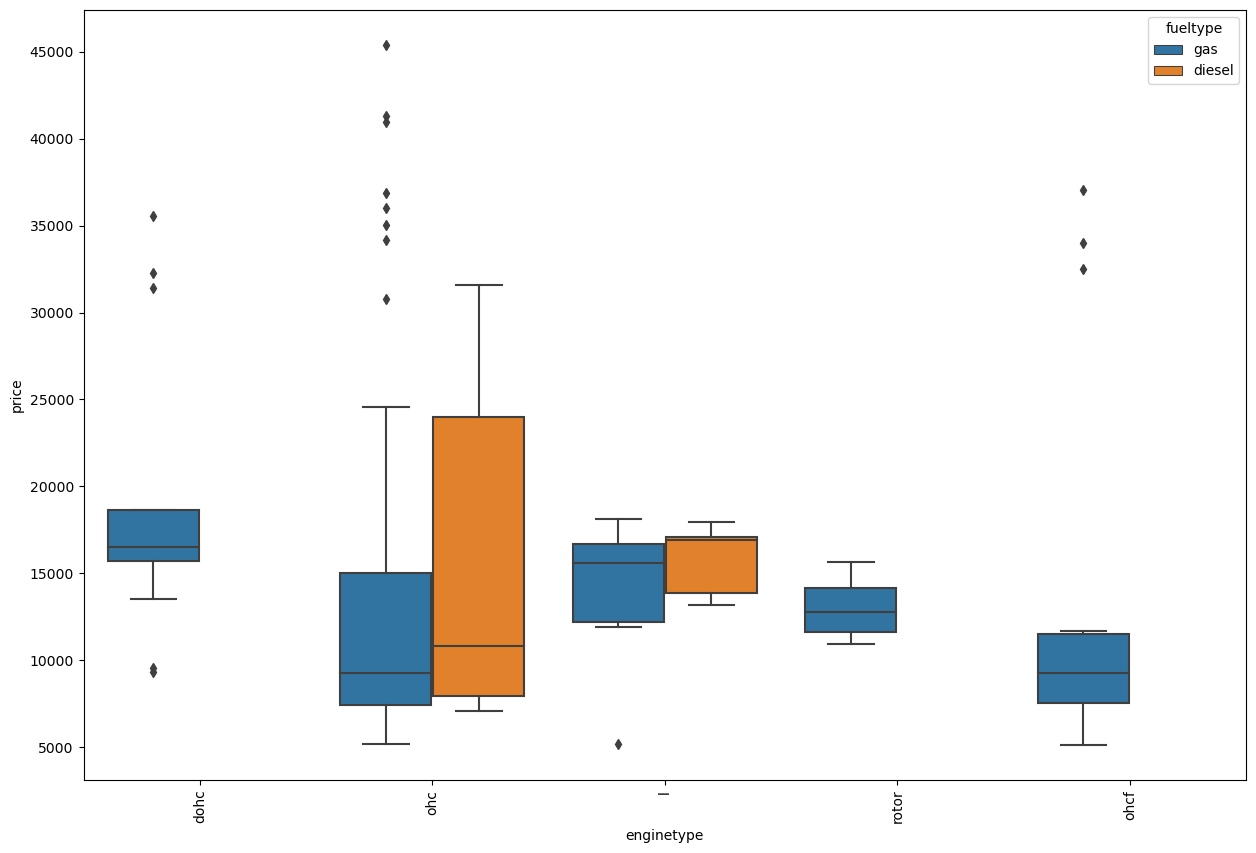

In [42]:
plt.figure(figsize=(15,10))
sns.boxplot(x='enginetype',y='price',hue='fueltype',data=df)
plt.xticks(rotation=90)
plt.show()

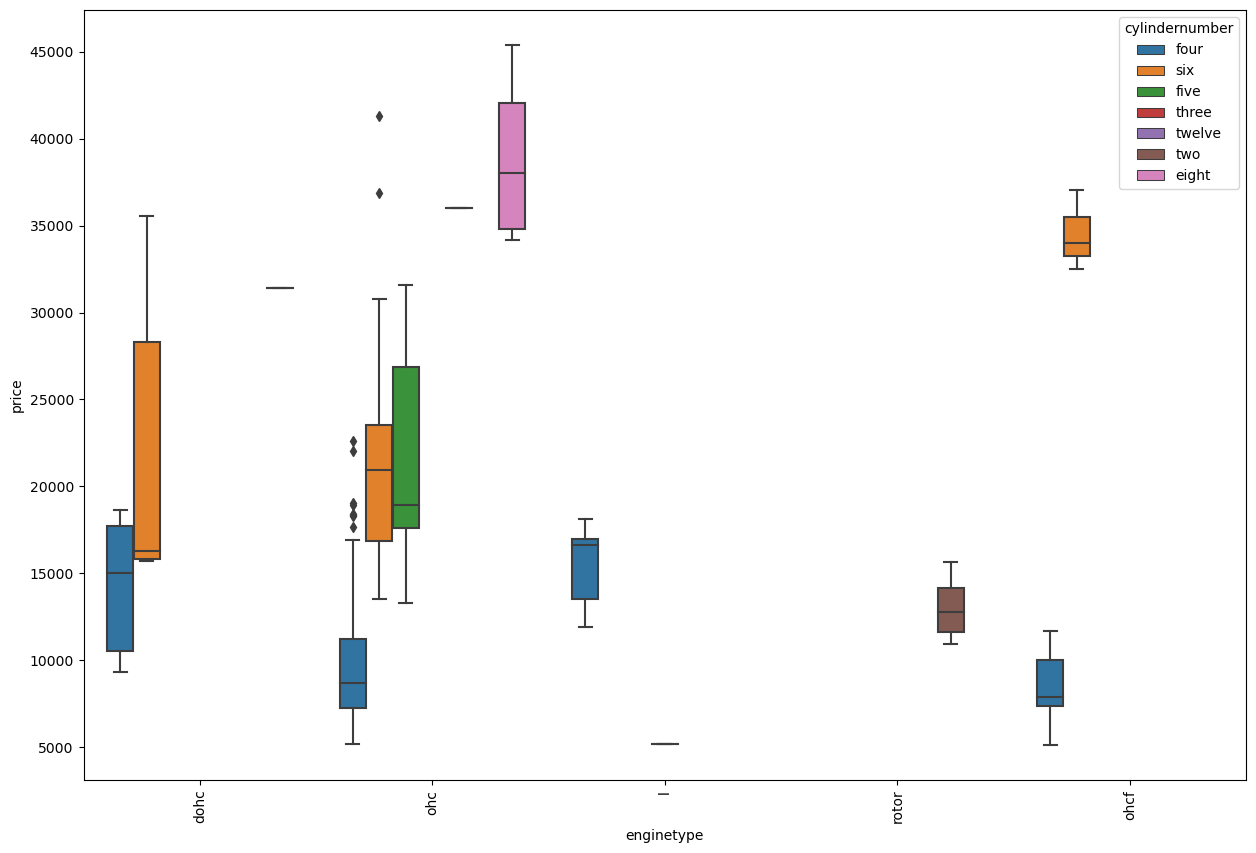

In [43]:
plt.figure(figsize=(15,10))
sns.boxplot(x='enginetype',y='price',hue='cylindernumber',data=df)
plt.xticks(rotation=90)
plt.show()

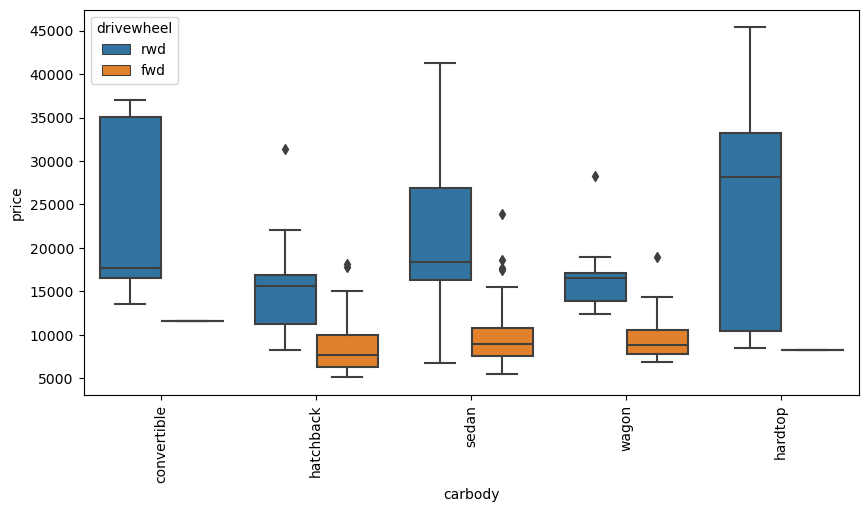

In [44]:
plt.figure(figsize=(10,5))
sns.boxplot(x='carbody',y='price',hue='drivewheel',data=df)
plt.xticks(rotation=90)
plt.show()

# Data Preparation

In [45]:
df.head(5)

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carheight,curbweight,enginetype,cylindernumber,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,price,Brand_name,enginesize/horsepower,curbweight/enginesize,carwidth/carlength,highway/city
0,risky,gas,std,two,convertible,rwd,front,88.6,48.8,2548,dohc,four,mpfi,3.47,2.68,9.0,111,5000,13495.0,alfa-romero,1.171171,19.600000,0.379739,1.285714
1,risky,gas,std,two,convertible,rwd,front,88.6,48.8,2548,dohc,four,mpfi,3.47,2.68,9.0,111,5000,16500.0,alfa-romero,1.171171,19.600000,0.379739,1.285714
2,moderate,gas,std,two,hatchback,rwd,front,94.5,52.4,2823,ohc,six,mpfi,2.68,3.47,9.0,154,5000,16500.0,alfa-romero,0.987013,18.572368,0.382593,1.368421
3,risky,gas,std,four,sedan,fwd,front,99.8,54.3,2337,ohc,four,mpfi,3.19,3.40,10.0,102,5500,13950.0,audi,1.068627,21.440367,0.374858,1.250000
4,risky,gas,std,four,sedan,fwd,front,99.4,54.3,2824,ohc,five,mpfi,3.19,3.40,8.0,115,5500,17450.0,audi,1.182609,20.764706,0.375991,1.222222


In [46]:
df['fueltype'].value_counts()

gas       185
diesel     20
Name: fueltype, dtype: int64

In [47]:
df['aspiration'].value_counts()

std      168
turbo     37
Name: aspiration, dtype: int64

In [48]:
df['doornumber'].value_counts()

four    115
two      90
Name: doornumber, dtype: int64

In [49]:
df['enginelocation'].value_counts()

front    202
rear       3
Name: enginelocation, dtype: int64

In [50]:
# now converting categorical vars having 2 levels to either 1 or 0
df['fueltype']=df['fueltype'].map({'gas':1,'diesel':0})
df['aspiration']=df['aspiration'].map({'std':1,'turbo':0})
df['doornumber']=df['doornumber'].map({'four':1,'two':0})
df['enginelocation']=df['enginelocation'].map({'front':1,'rear':0})

In [51]:
df.head(5)

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carheight,curbweight,enginetype,cylindernumber,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,price,Brand_name,enginesize/horsepower,curbweight/enginesize,carwidth/carlength,highway/city
0,risky,1,1,0,convertible,rwd,1,88.6,48.8,2548,dohc,four,mpfi,3.47,2.68,9.0,111,5000,13495.0,alfa-romero,1.171171,19.600000,0.379739,1.285714
1,risky,1,1,0,convertible,rwd,1,88.6,48.8,2548,dohc,four,mpfi,3.47,2.68,9.0,111,5000,16500.0,alfa-romero,1.171171,19.600000,0.379739,1.285714
2,moderate,1,1,0,hatchback,rwd,1,94.5,52.4,2823,ohc,six,mpfi,2.68,3.47,9.0,154,5000,16500.0,alfa-romero,0.987013,18.572368,0.382593,1.368421
3,risky,1,1,1,sedan,fwd,1,99.8,54.3,2337,ohc,four,mpfi,3.19,3.40,10.0,102,5500,13950.0,audi,1.068627,21.440367,0.374858,1.250000
4,risky,1,1,1,sedan,fwd,1,99.4,54.3,2824,ohc,five,mpfi,3.19,3.40,8.0,115,5500,17450.0,audi,1.182609,20.764706,0.375991,1.222222


In [52]:
# create buckets of low high med based on median price of that company as there are outliers so mean is not used
md=df.groupby(['Brand_name'])[['price']].median().to_dict()
md=md['price']
md

{'alfa-romero': 16500.0,
 'audi': 17710.0,
 'bmw': 22835.0,
 'buick': 32892.0,
 'chevrolet': 6295.0,
 'dodge': 7609.0,
 'honda': 7295.0,
 'isuzu': 8916.5,
 'jaguar': 35550.0,
 'mazda': 10595.0,
 'mercury': 16503.0,
 'mitsubishi': 8499.0,
 'nissan': 8124.0,
 'peugeot': 16630.0,
 'plymouth': 7609.0,
 'porsche': 32528.0,
 'renault': 9595.0,
 'saab': 15275.0,
 'subaru': 7894.0,
 'toyota': 9103.0,
 'volkswagen': 9737.5,
 'volvo': 18420.0}

In [53]:
dk=list(md.keys())
# median price <10000:low, 10000-20000:med and >20000:high
for i in dk:
    if md[i]<10000:
        md[i]='low'
    elif md[i]>=10000 and md[i]<=20000:
        md[i]='med'
    else:
        md[i]='high'
md

{'alfa-romero': 'med',
 'audi': 'med',
 'bmw': 'high',
 'buick': 'high',
 'chevrolet': 'low',
 'dodge': 'low',
 'honda': 'low',
 'isuzu': 'low',
 'jaguar': 'high',
 'mazda': 'med',
 'mercury': 'med',
 'mitsubishi': 'low',
 'nissan': 'low',
 'peugeot': 'med',
 'plymouth': 'low',
 'porsche': 'high',
 'renault': 'low',
 'saab': 'med',
 'subaru': 'low',
 'toyota': 'low',
 'volkswagen': 'low',
 'volvo': 'med'}

In [54]:
df.Brand_name=df.Brand_name.map(md)
df.Brand_name.unique()

array(['med', 'high', 'low'], dtype=object)

In [55]:
# creating dummy variables 
df1=pd.get_dummies(df,drop_first=True)

In [56]:
df1.columns

Index(['fueltype', 'aspiration', 'doornumber', 'enginelocation', 'wheelbase',
       'carheight', 'curbweight', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'price', 'enginesize/horsepower',
       'curbweight/enginesize', 'carwidth/carlength', 'highway/city',
       'symboling_risky', 'symboling_safe', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_rwd',
       'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_rotor',
       'cylindernumber_five', 'cylindernumber_four', 'cylindernumber_six',
       'cylindernumber_three', 'cylindernumber_twelve', 'cylindernumber_two',
       'fuelsystem_2bbl', 'fuelsystem_4bbl', 'fuelsystem_idi',
       'fuelsystem_mpfi', 'fuelsystem_spdi', 'fuelsystem_spfi',
       'Brand_name_low', 'Brand_name_med'],
      dtype='object')

In [57]:
df1.head(5)

,fueltype,aspiration,doornumber,enginelocation,wheelbase,carheight,curbweight,boreratio,stroke,compressionratio,horsepower,peakrpm,price,enginesize/horsepower,curbweight/enginesize,carwidth/carlength,highway/city,symboling_risky,symboling_safe,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_rwd,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,Brand_name_low,Brand_name_med
0,1,1,0,1,88.6,48.8,2548,3.47,2.68,9.0,111,5000,13495.0,1.171171,19.600000,0.379739,1.285714,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
1,1,1,0,1,88.6,48.8,2548,3.47,2.68,9.0,111,5000,16500.0,1.171171,19.600000,0.379739,1.285714,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
2,1,1,0,1,94.5,52.4,2823,2.68,3.47,9.0,154,5000,16500.0,0.987013,18.572368,0.382593,1.368421,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
3,1,1,1,1,99.8,54.3,2337,3.19,3.40,10.0,102,5500,13950.0,1.068627,21.440367,0.374858,1.250000,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
4,1,1,1,1,99.4,54.3,2824,3.19,3.40,8.0,115,5500,17450.0,1.182609,20.764706,0.375991,1.222222,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1


In [58]:
df1.describe()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,carheight,curbweight,boreratio,stroke,compressionratio,horsepower,peakrpm,price,enginesize/horsepower,curbweight/enginesize,carwidth/carlength,highway/city,symboling_risky,symboling_safe,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_rwd,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,Brand_name_low,Brand_name_med
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.902439,0.819512,0.560976,0.985366,98.756585,53.724878,2555.565854,3.329756,3.255415,10.142537,104.117073,5125.121951,13276.710571,1.266081,20.846378,0.379853,1.232268,0.287805,0.121951,0.039024,0.341463,0.468293,0.121951,0.370732,0.058537,0.785366,0.073171,0.019512,0.053659,0.775610,0.117073,0.004878,0.004878,0.019512,0.321951,0.014634,0.097561,0.463415,0.043902,0.004878,0.609756,0.273171
std,0.297446,0.385535,0.497483,0.120377,6.021776,2.443522,520.680204,0.270844,0.313597,3.972040,39.544167,476.985643,7988.852332,0.238452,3.178478,0.018224,0.088901,0.453848,0.328031,0.194127,0.475361,0.500215,0.328031,0.484183,0.235330,0.411573,0.261054,0.138655,0.225894,0.418201,0.322294,0.069843,0.069843,0.138655,0.468368,0.120377,0.297446,0.499880,0.205380,0.069843,0.488999,0.446679
min,0.000000,0.000000,0.000000,0.000000,86.600000,47.800000,1488.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,5118.000000,0.592593,12.116564,0.343891,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,1.000000,94.500000,52.000000,2145.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,7788.000000,1.131250,19.537879,0.368256,1.185185,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,97.000000,54.100000,2414.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,10295.000000,1.282353,20.865979,0.378702,1.230769,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,102.400000,55.500000,2935.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,16503.000000,1.405797,22.083333,0.387252,1.263158,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,120.900000,59.800000,4066.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,45400.000000,1.964286,34.071429,0.441909,1.647059,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Making train and test sets

In [59]:
df1_train,df1_test=train_test_split(df1,train_size=0.7, test_size=0.3,random_state=100)

In [60]:
print(df1_train.shape)
print(df1_test.shape)

(143, 42)
(62, 42)


In [61]:
# rescaling using minmax scaler
scaler=MinMaxScaler()

In [62]:
# applying scaler to all columns except the yes-no and dummy vars
num=['wheelbase', 'carheight', 'boreratio', 'stroke', 'compressionratio', 'peakrpm', 'horsepower', 'curbweight', 'price', 'curbweight/enginesize', 'carwidth/carlength', 'highway/city', 'enginesize/horsepower']
df1_train[num]=scaler.fit_transform(df1_train[num])

In [63]:
df1_train.head(5)

,fueltype,aspiration,doornumber,enginelocation,wheelbase,carheight,curbweight,boreratio,stroke,compressionratio,horsepower,peakrpm,price,enginesize/horsepower,curbweight/enginesize,carwidth/carlength,highway/city,symboling_risky,symboling_safe,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_rwd,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,Brand_name_low,Brand_name_med
122,1,1,1,1,0.244828,0.265487,0.272692,0.230159,0.525253,0.15000,0.083333,0.551020,0.068818,0.618640,0.466438,0.382172,0.348974,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0
125,1,1,0,1,0.272414,0.212389,0.500388,1.000000,0.464646,0.15625,0.395833,0.551020,0.466890,0.337795,0.286077,0.617135,0.650718,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
166,1,1,0,1,0.272414,0.424779,0.314973,0.444444,0.449495,0.15000,0.266667,1.000000,0.122110,0.205882,0.517098,0.361980,0.178322,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0
1,1,1,0,1,0.068966,0.088496,0.411171,0.626984,0.247475,0.12500,0.262500,0.346939,0.314446,0.421799,0.340855,0.365731,0.441558,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
199,1,0,1,1,0.610345,0.858407,0.647401,0.746032,0.484848,0.03125,0.475000,0.387755,0.382131,0.153005,0.554230,0.122844,0.454545,0,1,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1


In [64]:
df1_train.describe()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,carheight,curbweight,boreratio,stroke,compressionratio,horsepower,peakrpm,price,enginesize/horsepower,curbweight/enginesize,carwidth/carlength,highway/city,symboling_risky,symboling_safe,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_rwd,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,Brand_name_low,Brand_name_med
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.0,143.000000,143.000000
mean,0.909091,0.818182,0.559441,0.993007,0.411141,0.509004,0.407878,0.497946,0.535389,0.190787,0.227302,0.400029,0.219310,0.489932,0.405582,0.377391,0.355073,0.244755,0.104895,0.020979,0.342657,0.475524,0.132867,0.349650,0.062937,0.748252,0.083916,0.027972,0.062937,0.741259,0.132867,0.006993,0.006993,0.027972,0.349650,0.020979,0.090909,0.440559,0.041958,0.0,0.615385,0.265734
std,0.288490,0.387050,0.498199,0.083624,0.205581,0.215378,0.211269,0.207140,0.157843,0.237181,0.165511,0.196438,0.215682,0.171785,0.151818,0.187731,0.139367,0.431453,0.307495,0.143818,0.476266,0.501156,0.340624,0.478536,0.243703,0.435543,0.278236,0.165472,0.243703,0.439483,0.340624,0.083624,0.083624,0.165472,0.478536,0.143818,0.288490,0.498199,0.201198,0.0,0.488214,0.443276
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,1.000000,1.000000,0.000000,1.000000,0.272414,0.353982,0.245539,0.305556,0.464646,0.100000,0.091667,0.265306,0.067298,0.405376,0.339434,0.248714,0.275974,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,0.341379,0.522124,0.355702,0.500000,0.545455,0.125000,0.191667,0.428571,0.140343,0.505304,0.397537,0.361980,0.348974,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,0.503448,0.668142,0.559542,0.682540,0.611111,0.150000,0.283333,0.551020,0.313479,0.592847,0.447190,0.462799,0.412121,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.0,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000


Dividing into X and y set

In [65]:
y_train=df1_train.pop('price')
X_train=df1_train

# Building model

In [66]:
lm=LinearRegression()

In [67]:
lm.fit(X_train,y_train)

LinearRegression()

In [68]:
lm.score(X_train,y_train)

0.9563711390589146

Model building using RFE

In [69]:
rfe=RFE(estimator=lm,n_features_to_select=10)
rfe=rfe.fit(X_train,y_train)

In [70]:
col=X_train.columns[rfe.support_]
col

Index(['enginelocation', 'wheelbase', 'curbweight', 'horsepower',
       'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'Brand_name_low', 'Brand_name_med'],
      dtype='object')

# Building model using statsmodel for detailed statistics

In [71]:
X_train=X_train[col]

In [72]:
X_train_sm=sm.add_constant(X_train)

In [73]:
X_train_sm.head(5)

,const,enginelocation,wheelbase,curbweight,horsepower,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,Brand_name_low,Brand_name_med
122,1.0,1,0.244828,0.272692,0.083333,0,0,1,0,1,0
125,1.0,1,0.272414,0.500388,0.395833,0,1,0,0,0,0
166,1.0,1,0.272414,0.314973,0.266667,0,1,0,0,1,0
1,1.0,1,0.068966,0.411171,0.262500,0,0,0,0,0,1
199,1.0,1,0.610345,0.647401,0.475000,0,0,0,1,0,1


In [74]:
lm1=sm.OLS(y_train,X_train_sm).fit()

In [75]:
def VIF(x):
    v=pd.DataFrame()
    v['features']=x.columns
    v['vif']=[vif(x.values,i) for i in range(x.shape[1])]
    v['vif']=round(v['vif'],2)
    v=v.sort_values(by='vif',ascending=False)
    return v

In [76]:
print(lm1.summary())
VIF(X_train_sm)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     176.4
Date:                Tue, 26 Mar 2024   Prob (F-statistic):           2.87e-71
Time:                        16:39:54   Log-Likelihood:                 207.48
No. Observations:                 143   AIC:                            -393.0
Df Residuals:                     132   BIC:                            -360.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.5062      0.08

,features,vif
0,const,294.19
7,carbody_sedan,13.06
6,carbody_hatchback,11.37
3,curbweight,10.61
8,carbody_wagon,6.57
2,wheelbase,5.59
9,Brand_name_low,4.78
4,horsepower,4.30
10,Brand_name_med,3.19
5,carbody_hardtop,2.51


Removing columns one by one according to the preference:
- high vif, low p-value
- low vif, high p-value

In [77]:
X_train.drop('carbody_sedan',axis=1,inplace=True)

In [78]:
X_train_sm=sm.add_constant(X_train)
lm2=sm.OLS(y_train,X_train_sm).fit()
print(lm2.summary())
VIF(X_train_sm)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     186.6
Date:                Tue, 26 Mar 2024   Prob (F-statistic):           6.60e-71
Time:                        16:39:54   Log-Likelihood:                 203.69
No. Observations:                 143   AIC:                            -387.4
Df Residuals:                     133   BIC:                            -357.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.4096      0.07

,features,vif
0,const,240.85
3,curbweight,9.07
8,Brand_name_low,4.75
2,wheelbase,4.08
4,horsepower,4.08
9,Brand_name_med,3.19
1,enginelocation,1.71
5,carbody_hardtop,1.54
6,carbody_hatchback,1.34
7,carbody_wagon,1.26


In [79]:
X_train.drop('carbody_hardtop',axis=1,inplace=True)

In [80]:
X_train_sm=sm.add_constant(X_train)
lm3=sm.OLS(y_train,X_train_sm).fit()
print(lm3.summary())
VIF(X_train_sm)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     211.3
Date:                Tue, 26 Mar 2024   Prob (F-statistic):           4.58e-72
Time:                        16:39:54   Log-Likelihood:                 203.65
No. Observations:                 143   AIC:                            -389.3
Df Residuals:                     134   BIC:                            -362.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.3973      0.06

,features,vif
0,const,168.54
3,curbweight,9.07
7,Brand_name_low,4.71
2,wheelbase,4.08
4,horsepower,4.08
8,Brand_name_med,3.18
5,carbody_hatchback,1.31
6,carbody_wagon,1.25
1,enginelocation,1.20


In [81]:
X_train.drop('wheelbase',axis=1,inplace=True)

In [82]:
X_train_sm=sm.add_constant(X_train)
lm4=sm.OLS(y_train,X_train_sm).fit()
print(lm4.summary())
VIF(X_train_sm)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     241.9
Date:                Tue, 26 Mar 2024   Prob (F-statistic):           4.08e-73
Time:                        16:39:54   Log-Likelihood:                 203.26
No. Observations:                 143   AIC:                            -390.5
Df Residuals:                     135   BIC:                            -366.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.3955      0.06

,features,vif
0,const,168.37
6,Brand_name_low,4.70
2,curbweight,4.14
3,horsepower,3.19
7,Brand_name_med,3.18
4,carbody_hatchback,1.29
5,carbody_wagon,1.24
1,enginelocation,1.18


The pvalues of all features are below 0.05 and VIFs are also <5
Obtained R_square: 0.926 Adj.R_square:0.922

# Residual Analysis

In [83]:
# RA on train set
y_train_pred=lm4.predict(X_train_sm)

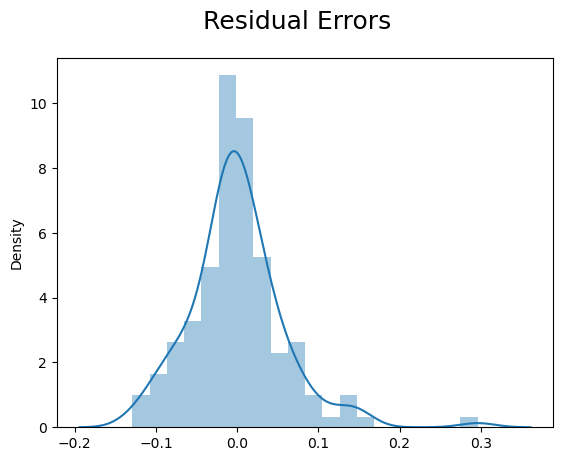

In [84]:
fig=plt.figure()
sns.distplot((y_train-y_train_pred),bins=20)
fig.suptitle('Residual Errors',fontsize=18)
plt.show()

The mean is centered at 0.0. It show a Normal Distribution Curve

Perform Residual Analysis on Test Data

In [85]:
df1_test[num]=scaler.transform(df1_test[num])
df1_test.describe()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,carheight,curbweight,boreratio,stroke,compressionratio,horsepower,peakrpm,price,enginesize/horsepower,curbweight/enginesize,carwidth/carlength,highway/city,symboling_risky,symboling_safe,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_rwd,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,Brand_name_low,Brand_name_med
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.0,62.000000,62.000000,62.000000,62.0,62.0,62.0,62.000000,62.0,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,0.887097,0.822581,0.564516,0.967742,0.437764,0.559663,0.428470,0.556580,0.544314,0.209375,0.248858,0.393351,0.239439,0.493432,0.379273,0.342657,0.367925,0.387097,0.161290,0.080645,0.338710,0.451613,0.096774,0.419355,0.048387,0.870968,0.048387,0.0,0.032258,0.854839,0.080645,0.0,0.0,0.0,0.258065,0.0,0.112903,0.516129,0.048387,0.016129,0.596774,0.290323
std,0.319058,0.385142,0.499868,0.178127,0.212861,0.215811,0.179488,0.228484,0.160738,0.273690,0.163376,0.192092,0.233076,0.179882,0.126288,0.180874,0.133403,0.491062,0.370801,0.274512,0.477134,0.501716,0.298064,0.497482,0.216335,0.337972,0.216335,0.0,0.178127,0.355139,0.274512,0.0,0.0,0.0,0.441142,0.0,0.319058,0.503819,0.216335,0.127000,0.494550,0.457617
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.141593,0.128394,-0.111111,-0.060606,0.000000,0.016667,0.000000,0.007763,0.119311,0.004729,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,1.000000,0.313793,0.384956,0.305275,0.404762,0.484848,0.093750,0.107292,0.265306,0.092342,0.369913,0.317447,0.229652,0.304833,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,0.387931,0.588496,0.406129,0.563492,0.585859,0.125000,0.218750,0.346939,0.158991,0.485552,0.405467,0.345263,0.375921,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,0.570690,0.699115,0.564876,0.746032,0.641414,0.150000,0.295833,0.540816,0.317243,0.588621,0.461491,0.396900,0.406699,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.0,0.0,0.0,0.750000,0.0,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.182759,1.061947,0.935609,0.888889,0.863636,1.000000,0.662500,1.000000,1.112855,1.000000,0.615282,1.000000,0.727273,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,0.0,0.0,0.0,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [86]:
y_test=df1_test.pop('price')
X_test=df1_test

In [87]:
X_test=X_test[col]

In [88]:
X_test.drop(columns=['carbody_sedan','carbody_hardtop','wheelbase'],inplace=True)

In [89]:
X_test_sm=sm.add_constant(X_test)
y_test_pred=lm4.predict(X_test_sm)

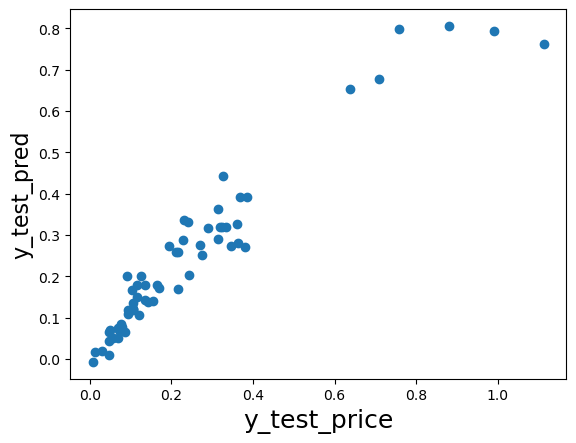

In [90]:
fig=plt.figure()
plt.scatter(y_test,y_test_pred)
plt.xlabel('y_test_price', fontsize=18)
plt.ylabel('y_test_pred', fontsize=16)
plt.show()

Evaluating the Model

In [91]:
RMSE=sqrt(mean_squared_error(y_test,y_test_pred))
print('Model RMSE: ',RMSE)

r2=r2_score(y_test,y_test_pred)
print('Model R_Square: ',r2)

Model RMSE:  0.06794161340978572
Model R_Square:  0.9136348872431622


R Square on Train data: 0.926
R Square on Test data: 0.914

Conclusion:
SO our model is good to explain the variance of the test set as much as it explains the variance of training set


Text(0, 0.5, 'Car Price')

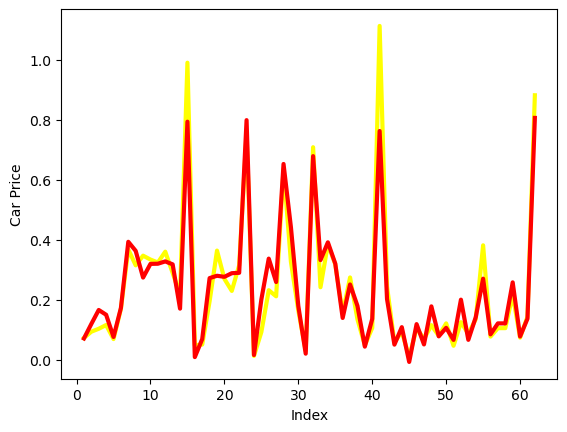

In [92]:
x=[i for i in range(1,63)]
fig=plt.figure()
plt.plot(x,y_test,color='yellow',linewidth=3)
plt.plot(x,y_test_pred,color='red',linewidth=3)
plt.xlabel('Index')
plt.ylabel('Car Price')

The tst vs predicted results almost overlap which is good.


### Recommendations

Based on the provided analysis, Geely Auto can use the following features to determine the price of a car to be distributed in the US market:

- Company Name: The brand value of the company is a significant factor influencing the price of a car. Companies like Porsche, BMW, and Jaguar produce luxury and high-performance cars, which tend to have higher prices compared to other brands.

- Symboling: Cars with higher safety ratings (symboling) typically have a higher price range than those with lower ratings. Consumers are often willing to pay more for safer vehicles.

- Fuel Type: The type of fuel used by the car (e.g., diesel or petrol) can also impact its price. Diesel-powered cars may be slightly more expensive than their petrol counterparts due to factors such as fuel efficiency and long-term cost savings.

- Engine Location: Cars with rear-mounted engines are typically more expensive than those with front-mounted engines. This is often seen in expensive sports cars, where a rear-mounted engine provides better balance and aerodynamics for high-speed performance.

- Cylinder Number: The number of cylinders in the engine also affects the price of a car. Generally, cars with a higher number of cylinders tend to have higher prices, as they often offer better performance and power.